In [2]:
import glob 
from pathlib import Path
import pandas as pd
import numpy as np
import os
import re
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# import dask.dataframe as dd
from tqdm import tqdm

In [25]:
PATH = r'/Users/peaceforlives/Documents/Projects/cyberbullying/'
data = pd.read_pickle(PATH+'final_classification/results/data_docs.pkl')
data_docs = pd.read_pickle(PATH+'final_classification/results/full_data.pkl')

In [26]:
cols = ['bullying_trace', 'bullying_role', 'form_of_bullying', 'bullying_post_type']
df = pd.concat([data_docs, data[cols]], axis=1)
df.loc[df['bullying_trace']=='no', 'bullying_trace'] = 'NA'
df.set_index(pd.to_datetime(df['created_at']), inplace=True)
df.drop('created_at', inplace=True, axis=1)
df['full_tweet'] = df['full_tweet'].astype(str)

df['date'] = [i.date() for i in df.index]
df['datestr'] = [i.date().strftime('%Y-%m-%d') for i in df.index]

df['time'] = [i.time() for i in df.index]
df['hour'] = [i.hour for i in df.index]
df['day'] = [i.day for i in df.index]
df['wkday'] = [i.weekday() for i in df.index]
df['month'] = [i.month for i in df.index]

# df = df[df.datestr != '2020-04-01']

pd.options.display.max_colwidth = 100
df.drop(['source'], axis=1, inplace=True)

df['clean_tweet'] = [re.sub('\S*@\S*\s?', '', sent) for sent in df['full_tweet']] # Remove usernames
df.shape

(839680, 21)

In [41]:
keys = ['suicide']
df['suicide_flag'] = np.where(df.full_tweet.str.contains('|'.join(keys)),1,0)
print(df[df['suicide_flag']==1].shape)

(53167, 22)


In [49]:
df_suicide = df[df['suicide_flag']==1]
df_suicide = df_suicide[df_suicide['bullying_trace']=='yes']
df_suicide['form_of_bullying'].value_counts()

general     15644
cyber        2259
physical        3
Name: form_of_bullying, dtype: int64

In [61]:
df_suicide.groupby(['bullying_post_type','bullying_role']).agg('count')['id'].to_clipboard()

In [43]:
pd.options.display.max_colwidth = 50000
df[df['suicide_flag']==1].tail(8)

,id,geo,coordinates,place,lang,full_tweet,timezone,localtime,state,bullying_trace,...,bullying_post_type,date,datestr,time,hour,day,wkday,month,clean_tweet,suicide_flag
created_at,,,,,,,,,,,,,,,,,,,,,
2020-04-01 03:24:13+00:00,1245190200755662849,None,None,None,en,"@notnotmrpurple1 @sinnamonaleks @wormwoo04548746 @rubyjeanette2 @cartoonnetwork @a_cayaarts black and hispanic discrimination is very much real, but it’s less...in your face these days. like it’s more people making racist remarks than actual physical bullying, which is rampant among lgbt youth. the point is that transphobes talk about how the suicide rate is so high...",None,None,None,NA,...,NA,2020-04-01,2020-04-01,03:24:13,3,1,2,4,"black and hispanic discrimination is very much real, but it’s less...in your face these days. like it’s more people making racist remarks than actual physical bullying, which is rampant among lgbt youth. the point is that transphobes talk about how the suicide rate is so high...",1
2020-04-01 03:28:24+00:00,1245191255631503360,None,None,None,en,"@luuroa_ dont let the fact that it’s anime deter you: a silent voice. tw for topics like bullying and suicide, but it has a happy ending and i sobbed throughout the whole thing",None,None,None,NA,...,NA,2020-04-01,2020-04-01,03:28:24,3,1,2,4,"dont let the fact that it’s anime deter you: a silent voice. tw for topics like bullying and suicide, but it has a happy ending and i sobbed throughout the whole thing",1
2020-04-01 03:29:17+00:00,1245191478474924037,None,None,"{'id': 'b62cd77425868341', 'url': 'https://api.twitter.com/1.1/geo/id/b62cd77425868341.json', 'place_type': 'country', 'name': 'Iraq', 'full_name': 'Iraq', 'country_code': 'IQ', 'country': 'Iraq', 'bounding_box': {'type': 'Polygon', 'coordinates': [[[38.794701, 29.07171], [38.794701, 37.37804], [48.575908, 37.37804], [48.575908, 29.07171]]]}, 'attributes': {}}",en,@whos_alexx it’s kinda sad how he was so kind to people even tho they were bullying him but the question is did he commit suicide or he was actually murdered?!,None,None,None,NA,...,NA,2020-04-01,2020-04-01,03:29:17,3,1,2,4,it’s kinda sad how he was so kind to people even tho they were bullying him but the question is did he commit suicide or he was actually murdered?!,1
2020-04-01 03:34:06+00:00,1245192688158355458,None,None,None,en,"@cloudy_starss lgbt people have a much higher rate of suicide, especially young ones. this is because they’re bullied and disliked, this dislike make them feel like black sheep. this is why when you dislike or treat differently an lgbt person, it is homophobia",None,None,None,NA,...,NA,2020-04-01,2020-04-01,03:34:06,3,1,2,4,"lgbt people have a much higher rate of suicide, especially young ones. this is because they’re bullied and disliked, this dislike make them feel like black sheep. this is why when you dislike or treat differently an lgbt person, it is homophobia",1
2020-04-01 03:37:15+00:00,1245193482815373313,None,None,None,en,@baylamaxine @leafyishere i hope you're fully aware you want somebody back on twitter and possibly youtube who bullied children and even told some to commit suicide. that's just messed up you know.,None,None,None,yes,...,report,2020-04-01,2020-04-01,03:37:15,3,1,2,4,i hope you're fully aware you want somebody back on twitter and possibly youtube who bullied children and even told some to commit suicide. that's just messed up you know.,1
2020-04-01 03:40:14+00:00,1245194231439863810,None,None,None,en,"@cartoonnetwork you know, maybe not harassing and bullying trans people would lower trans suicide rates? just a thought??",None,None,None,NA,...,NA,2020-04-01,2020-04-01,03:40:14,3,1,2,4,"you know, maybe not harassing and bullying trans people would lower trans suicide rates? just a thought??",1
2020-04-01 03:48:15+00:00,1245196251412529155,None,None,None,en,"@cherry_sg_berri isnt this the guy who became a millionaire by overlapping game footage with himself bullying people to breakdown and suicide while breaching every

In [39]:
corona.columns

Index(['coordinates', 'created_at', 'hashtags', 'media', 'urls',
       'favorite_count', 'id', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_user_id', 'lang', 'place',
       'possibly_sensitive', 'retweet_count', 'reweet_id',
       'retweet_screen_name', 'source', 'text', 'tweet_url', 'user_created_at',
       'user_screen_name', 'user_default_profile_image', 'user_description',
       'user_favourites_count', 'user_followers_count', 'user_friends_count',
       'user_listed_count', 'user_location', 'user_name', 'user_screen_name.1',
       'user_statuses_count', 'user_time_zone', 'user_urls', 'user_verified',
       'corona_flag', 'suicide_flag'],
      dtype='object')

In [4]:
filenames = glob.glob(PATH+ "corona/*.csv")
dfs = []
for filename in filenames:
    dfs.append(pd.read_csv(filename))
corona = pd.concat(dfs, ignore_index=True)
corona.shape

//anaconda3/envs/twitter_cyberbullying/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(2653935, 34)

In [5]:
corona.head()

,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,...,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_screen_name.1,user_statuses_count,user_time_zone,user_urls,user_verified
0,NaN,Fri Mar 20 04:41:54 +0000 2020,NaN,NaN,NaN,0,1240861096736509953,NaN,NaN,NaN,...,153,151,0,JOG,𝐚𝐢𝐬𝐲,xstardustt,6107,NaN,NaN,False
1,NaN,Fri Mar 20 04:41:50 +0000 2020,NaN,NaN,NaN,0,1240861080454402048,NaN,NaN,NaN,...,12,131,1,NaN,julian casablancas is ugly,lizardcooter,412,NaN,NaN,False
2,NaN,Fri Mar 20 04:41:54 +0000 2020,NaN,NaN,NaN,0,1240861096916860929,NaN,NaN,NaN,...,27,297,1,"Navi Mumbai, India",Swanand Pandit,SwanandPandit,882,NaN,NaN,False
3,NaN,Fri Mar 20 04:41:53 +0000 2020,NaN,NaN,https://twitter.com/iocheffin/status/124061823...,0,1240861094312321024,NaN,NaN,NaN,...,160,332,2,"Pennsylvania, USA",CoRe 🤴🏾,Coredonn,6688,NaN,NaN,False
4,NaN,Fri Mar 20 04:41:49 +0000 2020,NaN,NaN,NaN,0,1240861078998917120,NaN,NaN,NaN,...,793,799,6,NaN,✿,lovattowers,73350,NaN,NaN,False


In [6]:
%%time

with open(filenames[-1]) as file:
    n_rows = len(file.readlines())

print (f'Exact number of rows: {n_rows}')

Exact number of rows: 5189095
CPU times: user 9.24 s, sys: 7.26 s, total: 16.5 s
Wall time: 17.1 s


In [7]:
%%time

# Same method but more 'pythonic'
import subprocess

def file_len(fname):
    p = subprocess.Popen(['wc', '-l', fname], stdout=subprocess.PIPE, 
                                              stderr=subprocess.PIPE)
    result, err = p.communicate()
    if p.returncode != 0:
        raise IOError(err)
    return int(result.strip().split()[0])+1

n_rows = file_len(filenames[-1])
print (f'Exact number of rows: {n_rows}')

Exact number of rows: 5188365
CPU times: user 2.68 ms, sys: 92.5 ms, total: 95.2 ms
Wall time: 1.39 s


In [ ]:
# corona = pd.read_csv(filenames[-1], header=None, names=['id', 'score'])
# corona.head()

//anaconda3/envs/twitter_cyberbullying/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (0,5,6,8,9,13,14,21,23,24,25,26,30,31,33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [193]:
# corona['id'].to_csv('81_ids.txt', header=False, index=False)

In [17]:
keys = ['bully', 'bullying', 'bullied', 'cyberbully', 'cyberbullies', 'cyberbullying']
corona['corona_flag'] = np.where(corona.text.str.contains('|'.join(keys)),1,0)
print(corona[corona['corona_flag']==1].shape)

(501, 36)


In [37]:
corona_bull = corona[corona['corona_flag']==1]
corona_bull = corona_bull[ ~ corona_bull['text'].str.startswith('RT')]
corona_bull = corona_bull[ ~ corona_bull['text'].str.contains('|'.join(['Trump','POTUS', 'Donald','Joe', 'Biden']))]
corona_bull.shape

(270, 36)

In [38]:
pd.options.display.max_colwidth = 50000
corona_bull['text'].tail(25)

2329652                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             Typical - a BBC journalist who is actually good at her job is targeted by Govt &amp; Daily Mail. For investigating &amp; reporting an important issue.  @The_Crox deserves full support not vilification. This bullying needs to be challenged robustly. https://t.co/Fa7TKF2nqb
2336163                                            

In [11]:
keys = ['suicide']
corona['suicide_flag'] = np.where(corona.text.str.contains('|'.join(keys)),1,0)
print(corona[corona['suicide_flag']==1].shape)

(1628, 36)


In [10]:
corona.shape

(2653935, 35)

In [176]:
corona_id = corona.id.values
df_id = df.id.values

common = set.intersection(set(df_id), set(corona_id))
print(len(common))

df_cor = df[df['id'].isin(list(common))]

pd.options.display.max_colwidth = 50000
df_cor['full_tweet']

0


In [122]:
keys = ['corona', 'covid', 'covid-19', 'covid19', 'coronavirus', 'sarscov2', 'sars-cov-2', 
        'sarscov', 'covididiot', 'covidiot', 'chinese virus', 'wuhan virus']
# keys = ['wuhan virus']
df['corona_flag'] = np.where(df.clean_tweet.str.contains('|'.join(keys)),1,0)

In [183]:
corona[corona['corona_flag']==1]

,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,...,user_friends_count,user_listed_count,user_location,user_name,user_screen_name.1,user_statuses_count,user_time_zone,user_urls,user_verified,corona_flag


In [155]:
pd.options.display.max_colwidth = 50000
df_cor = df[df['corona_flag']==1]
df_cor = df_cor[~df_cor['full_tweet'].str.contains("coronation")]
df_cor = df_cor.loc['2020-01-21':]
print(df_cor.shape)

(2504, 22)


In [156]:
df_cor['bullying_trace'].value_counts()

NA     2173
yes     331
Name: bullying_trace, dtype: int64

In [159]:
b_trace = df_cor[df_cor['bullying_trace']=='yes']
b_trace['form_of_bullying'].value_counts()

general    220
cyber      111
Name: form_of_bullying, dtype: int64

In [160]:
b_trace = df_cor[df_cor['bullying_trace']=='yes']
role = b_trace.groupby(["date","bullying_role"]).count()['id'].unstack()
post_type = b_trace.groupby(["date","bullying_post_type"]).count()['id'].unstack()
form = b_trace.groupby(["date","form_of_bullying"]).count()['id'].unstack()

n_tweets_full = df_cor['date'].groupby(df_cor['date']).count()  # total by date
n_tweets = b_trace['date'].groupby(b_trace['date']).count()  # total by date

n =5
n_max = n_tweets_full.nlargest(n).sort_index()
n_max
x = n_max.index
y = n_max.values

y_max = y.max()
x_max = x[np.argmax(y)]
display(x_max, y_max)

datetime.date(2020, 3, 23)

211

In [194]:
n_tweets_full

date
2020-01-21     1
2020-01-22     1
2020-01-23     1
2020-01-24     1
2020-01-25     4
              ..
2020-03-28    48
2020-03-29    54
2020-03-30    51
2020-03-31    68
2020-04-01    14
Name: date, Length: 72, dtype: int64

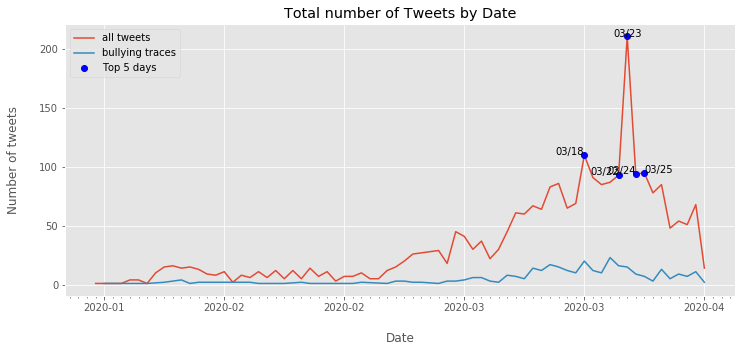

In [161]:
# years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
days = mdates.DayLocator()  # every month
years_fmt = mdates.DateFormatter('%Y-%m')

plt.rcParams['figure.figsize'] = [12, 5]
plt.style.use('ggplot')
fig = plt.figure()
ax = fig.add_subplot(1,1,1)  

plt.plot(n_tweets_full, label='all tweets')
plt.plot(n_tweets, label='bullying traces')
plt.plot(n_max, 'ro', c='b', label='Top 5 days')   

pos = ['right','right','center','right','left']
for i, txt in enumerate(x):
    ax.annotate(txt.strftime('%m/%d'), (x[i], y[i]), ha=pos[i])
    
plt.xlabel("\nDate")
plt.ylabel("Number of tweets\n")
plt.title("Total number of Tweets by Date")
plt.xticks()

# ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(days)
plt.legend(loc='upper left', frameon=True)
plt.savefig('corona_bullying_traces.pdf', bbox_inches='tight')

In [152]:
b_trace.loc['2019-09-23':'2020-02-01'].head(25)

,id,geo,coordinates,place,lang,full_tweet,timezone,localtime,state,bullying_trace,...,bullying_post_type,date,datestr,time,hour,day,wkday,month,clean_tweet,corona_flag
created_at,,,,,,,,,,,,,,,,,,,,,
2019-09-27 02:13:03+00:00,1177405762534027264,None,None,None,en,"@texastribune goodbye to rosie, the queen of corona. seein' me and julio down by the schoolyard. @juliancastro proved his #scumbag rating when he made the decision to reveal party donors. this a man who was bullied as a child and now seeks revenge. farewell mr. castro.",None,None,None,yes,...,report,2019-09-27,2019-09-27,02:13:03,2,27,4,9,"goodbye to rosie, the queen of corona. seein' me and julio down by the schoolyard. proved his #scumbag rating when he made the decision to reveal party donors. this a man who was bullied as a child and now seeks revenge. farewell mr. castro.",1
2020-01-22 13:50:04+00:00,1219980554147332096,None,None,None,en,#whyidrankbefore21 my neighbor at the time jacob forced me. he dragged me into our woods and force fed corona light down my throat. he was the town bully and i still till this day have nightmares. he’s the love of my life.,None,None,None,yes,...,self-disclosure,2020-01-22,2020-01-22,13:50:04,13,22,2,1,#whyidrankbefore21 my neighbor at the time jacob forced me. he dragged me into our woods and force fed corona light down my throat. he was the town bully and i still till this day have nightmares. he’s the love of my life.,1
2020-01-25 06:15:19+00:00,1220953272623779840,None,None,None,en,"i was about to bully someone for being scared of the corona virus, but then i realized that it's a human being with their own life and fears and i couldn't do it...\n\nwhat's... happening to me...",None,None,None,yes,...,self-disclosure,2020-01-25,2020-01-25,06:15:19,6,25,5,1,"i was about to bully someone for being scared of the corona virus, but then i realized that it's a human being with their own life and fears and i couldn't do it...\n\nwhat's... happening to me...",1
2020-01-26 16:39:47+00:00,1221472813069897728,None,None,None,en,"so my cousin was ignored by his friends and bullied by some of his classmates for being an asian, they blamed him believing that asians are the reason why the novel coronavirus spread across countries",None,None,None,yes,...,report,2020-01-26,2020-01-26,16:39:47,16,26,6,1,"so my cousin was ignored by his friends and bullied by some of his classmates for being an asian, they blamed him believing that asians are the reason why the novel coronavirus spread across countries",1
2020-01-27 17:03:32+00:00,1221841177995071490,None,None,None,en,"@ischinar #coronavirus #coronaviruscanada #coronavirus #coronaphobia\nwhy are you posting this to scare people? where is the date &amp; time stamp on the video? do you know chinese kids are targeted by racist, hate &amp; bullied by western people?\n\ndo you know the following?\nhttps://t.co/7q0fmztfzu https://t.co/037ei7fkgl",None,None,None,yes,...,report,2020-01-27,2020-01-27,17:03:32,17,27,0,1,"#coronavirus #coronaviruscanada #coronavirus #coronaphobia\nwhy are you posting this to scare people? where is the date &amp; time stamp on the video? do you know chinese kids are targeted by racist, hate &amp; bullied by western people?\n\ndo you know the following?\nhttps://t.co/7q0fmztfzu https://t.co/037ei7fkgl",1
2020-01-29 02:03:26+00:00,1222339435758419968,None,None,None,en,i made a joke about coronavirus in class today and this bitch who bullied me so bad i got ptsd keeled over laughing.. idk i used to do everything i could to impress her and seeing her laugh so hard made me pretty happy lol,None,None,None,yes,...,self-disclosure,2020-01-29,2020-01-29,02:03:26,2,29,2,1,i made a joke about coronavirus in class today and this bitch who bullied me so bad i got ptsd keeled over laughing.. idk i used to do everything i could to impress her and seeing her laugh so hard made me pretty happy lol,1
2020-01-29 22:51:21+00:00,1222653487177183233,None,None,None,en,daughter was telling me about 

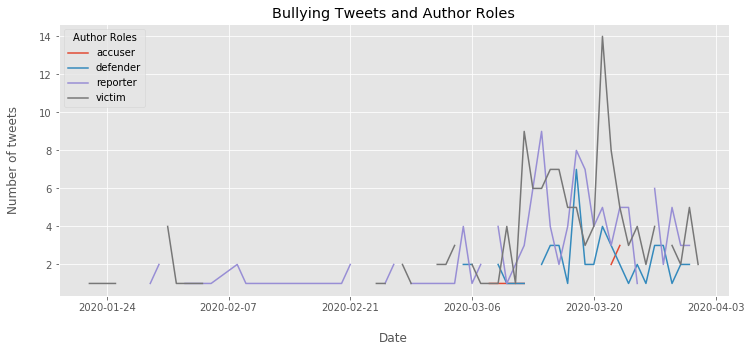

In [163]:
role.plot()
plt.xlabel("\nDate")
plt.ylabel("Number of tweets\n")
plt.title("Bullying Tweets and Author Roles")
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(days)
plt.legend(loc='upper left', frameon=True, title = 'Author Roles')

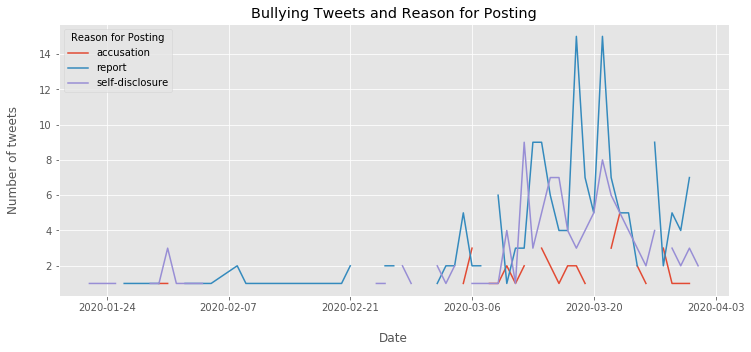

In [164]:
post_type.plot()
plt.xlabel("\nDate")
plt.ylabel("Number of tweets\n")
plt.title("Bullying Tweets and Reason for Posting")
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(days)
# plt.yscale('log')
plt.legend(loc='upper left', frameon=True, title = 'Reason for Posting')

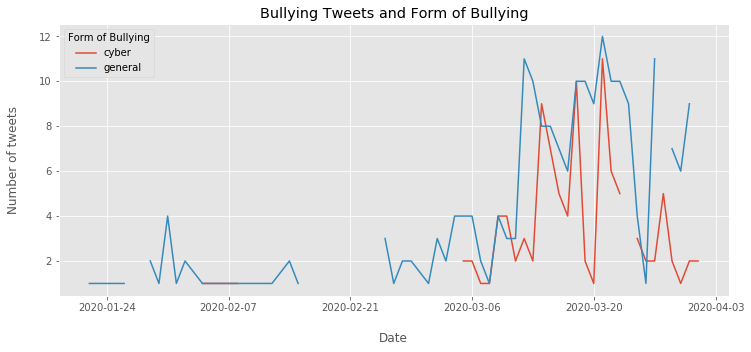

In [165]:
form.plot()
plt.xlabel("\nDate")
plt.ylabel("Number of tweets\n")
plt.title("Bullying Tweets and Form of Bullying")
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(days)
# plt.yscale('log')
plt.legend(loc='upper left', frameon=True, title = 'Form of Bullying')

In [168]:
b_trace = df_cor[df_cor['form_of_bullying']=='cyber']

In [170]:
b_trace.head(25)

,id,geo,coordinates,place,lang,full_tweet,timezone,localtime,state,bullying_trace,...,bullying_post_type,date,datestr,time,hour,day,wkday,month,clean_tweet,corona_flag
created_at,,,,,,,,,,,,,,,,,,,,,
2020-01-27 17:03:32+00:00,1221841177995071490,None,None,None,en,"@ischinar #coronavirus #coronaviruscanada #coronavirus #coronaphobia\nwhy are you posting this to scare people? where is the date &amp; time stamp on the video? do you know chinese kids are targeted by racist, hate &amp; bullied by western people?\n\ndo you know the following?\nhttps://t.co/7q0fmztfzu https://t.co/037ei7fkgl",None,None,None,yes,...,report,2020-01-27,2020-01-27,17:03:32,17,27,0,1,"#coronavirus #coronaviruscanada #coronavirus #coronaphobia\nwhy are you posting this to scare people? where is the date &amp; time stamp on the video? do you know chinese kids are targeted by racist, hate &amp; bullied by western people?\n\ndo you know the following?\nhttps://t.co/7q0fmztfzu https://t.co/037ei7fkgl",1
2020-01-30 05:30:55+00:00,1222754039118479360,None,None,None,en,"@sumabuk @cartieerju @chanelcult @lombardipls @ksjay37 @hadraci @ellalovesot7 @a7kilr you can pretend to be blind 🥴\ntweeting someone's @ and telling people to attack him is both cyber bullying and targeted harassment.\nhis isn't racist, he tweeted days ago praising about china for building a new hospital for corona within days.",None,None,None,yes,...,accusation,2020-01-30,2020-01-30,05:30:55,5,30,3,1,"you can pretend to be blind 🥴\ntweeting someone's and telling people to attack him is both cyber bullying and targeted harassment.\nhis isn't racist, he tweeted days ago praising about china for building a new hospital for corona within days.",1
2020-01-30 22:19:20+00:00,1223007814550876160,None,None,"{'id': 'd838baf51d1c629d', 'url': 'https://api.twitter.com/1.1/geo/id/d838baf51d1c629d.json', 'place_type': 'city', 'name': 'Fontana', 'full_name': 'Fontana, CA', 'country_code': 'US', 'country': 'United States', 'bounding_box': {'type': 'Polygon', 'coordinates': [[[-117.524329, 34.033432], [-117.524329, 34.182889], [-117.401067, 34.182889], [-117.401067, 34.033432]]]}, 'attributes': {}}",en,finna have my homie bully some asian bish in her comments about coronavirus then dm her saying how mean they are but i’m a nice guy,None,None,None,yes,...,report,2020-01-30,2020-01-30,22:19:20,22,30,3,1,finna have my homie bully some asian bish in her comments about coronavirus then dm her saying how mean they are but i’m a nice guy,1
2020-02-04 05:57:54+00:00,1224572771478528001,None,None,None,en,my mother is bullying the chinese people on instagram saying it’s their fault creating the coronavirus bc they eat bats,None,None,None,yes,...,report,2020-02-04,2020-02-04,05:57:54,5,4,1,2,my mother is bullying the chinese people on instagram saying it’s their fault creating the coronavirus bc they eat bats,1
2020-02-05 11:16:49+00:00,1225015416394780673,None,None,None,en,"@alexfordham hi @twitter, please can you ban @alexfordham for bullying - coronavirus is no laughing matter",None,None,None,yes,...,accusation,2020-02-05,2020-02-05,11:16:49,11,5,2,2,hi please can you ban for bullying - coronavirus is no laughing matter,1
2020-02-08 19:23:18+00:00,1226225008504188931,None,None,None,en,"wa doro t7waw whoever made fun of that boy whose tiktok ""corona machi ta original"" yall fcking mean and ugly for bullying a poor boy just trying to be himself i-????????? yall disgusting block me if you made fun of him",None,None,None,yes,...,report,2020-02-08,2020-02-08,19:23:18,19,8,5,2,"wa doro t7waw whoever made fun of that boy whose tiktok ""corona machi ta original"" yall fcking mean and ugly for bullying a poor boy just trying to be himself i-????????? yall disgusting block me if you made fun of him",1
2020-02-20 20:34:48+00:00,1230591652932313097,None,None,None,en,"this hearkens back to the backlash against japanese americans during wwii. please, can we learn the lessons of the past so that we don't reenact them?!\ncoronavirus: 

In [30]:
# df_cor = df[df['full_tweet'].isin(keys)]
# df_cor = df[df['full_tweet'].str.contains('covid')] 
# df_cor = df[df['full_tweet'].str.match('corona')]

(0, 21)


Series([], Name: full_tweet, dtype: object)

In [4]:
pd.options.display.max_colwidth = 500
b_trace = df[df['bullying_trace']=='yes']
print(b_trace.shape)
print(b_trace.full_tweet.unique().shape)

b_trace.drop_duplicates(['full_tweet'], inplace=True)
print(b_trace.shape)

(239847, 20)
(236878,)
(236878, 20)


//anaconda3/envs/twitter_cyberbullying/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
